In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from matplotlib.pyplot import acorr

%matplotlib inline


In [4]:
# matplotlib.pyplot.acorr(x, hold=None, data=None, **kwargs)
# Plot the autocorrelation of x.

# Parameters:	
# x : sequence of scalar

# hold : boolean, optional, default: True

# detrend : callable, optional, default: mlab.detrend_none

# x is detrended by the detrend callable. Default is no normalization.

# normed : boolean, optional, default: True

# if True, normalize the data by the autocorrelation at the 0-th lag.

# usevlines : boolean, optional, default: True

# if True, Axes.vlines is used to plot the vertical lines from the origin to the acorr. Otherwise, Axes.plot is used.

# maxlags : integer, optional, default: 10

# number of lags to show. If None, will return all 2 * len(x) - 1 lags.

# Returns:	
# (lags, c, line, b) : where:

# lags are a length 2`maxlags+1 lag vector.
# c is the 2`maxlags+1 auto correlation vectorI
# line is a Line2D instance returned by plot.
# b is the x-axis.

In [5]:
# statsmodels.tsa.stattools.pacf(x, nlags=40, method='ywunbiased', alpha=None)[source]
# Partial autocorrelation estimated

# Parameters:	
# x : 1d array
# observations of time series for which pacf is calculated
# nlags : int
# largest lag for which pacf is returned
# method : ‘ywunbiased’ (default) or ‘ywmle’ or ‘ols’
# specifies which method for the calculations to use:
# yw or ywunbiased : yule walker with bias correction in denominator for acovf
# ywm or ywmle : yule walker without bias correction
# ols - regression of time series on lags of it and on constant
# ld or ldunbiased : Levinson-Durbin recursion with bias correction
# ldb or ldbiased : Levinson-Durbin recursion without bias correction
# alpha : scalar, optional
# If a number is given, the confidence intervals for the given level are returned. For instance if alpha=.05, 95 % confidence intervals are returned where the standard deviation is computed according to 1/sqrt(len(x))
# Returns:	
# pacf : 1d array
# partial autocorrelations, nlags elements, including lag zero
# confint : array, optional
# Confidence intervals for the PACF. Returned if confint is not None.


In [6]:
housing = pd.read_csv('HousingStarts.csv')
housing.head()
#autocorrelation_plot(df)

,Year,HousingStarts
0,1959,1517.0
1,1960,1252.2
2,1961,1313.0
3,1962,1462.9
4,1963,1603.2


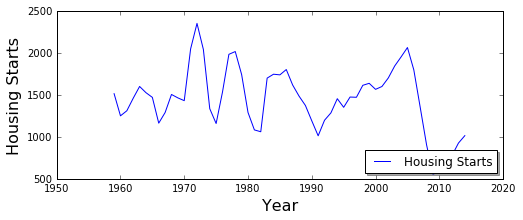

In [7]:
fig, ax = plt.subplots(figsize=(8,3))
plt.plot(housing.Year, housing.HousingStarts, label = "Housing Starts")
# plt.title("USA Housing Starts Over Time \n Yearly Level Data",
#             size = 20)
plt.ylabel('Housing Starts', size = 16)
plt.xlabel('Year', size = 16)
plt.legend(loc='lower right', shadow=True)



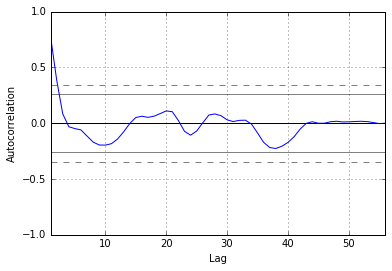

In [8]:
autocorrelation_plot(housing.HousingStarts)


In [9]:
array = (housing.HousingStarts.as_matrix())
array

array([ 1517. ,  1252.2,  1313. ,  1462.9,  1603.2,  1528.8,  1472.8,
        1164.9,  1291.6,  1507.6,  1466.8,  1433.6,  2052.2,  2356.6,
        2045.3,  1337.7,  1160.4,  1537.5,  1987.1,  2020.3,  1745.1,
        1292.2,  1084.2,  1062.2,  1703. ,  1749.5,  1741.8,  1805.4,
        1620.5,  1488.1,  1376.1,  1192.7,  1013.9,  1199.7,  1287.6,
        1457. ,  1354.1,  1476.8,  1474. ,  1616.9,  1640.9,  1568.7,
        1602.7,  1704.9,  1847.7,  1955.8,  2068.3,  1800.9,  1355. ,
         905.5,   554. ,   587.6,   608.8,   780.6,   926.9,  1015.6])

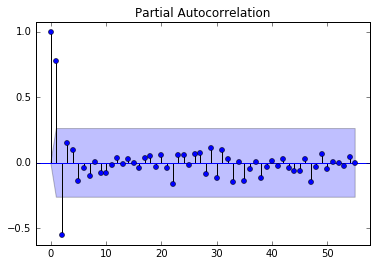

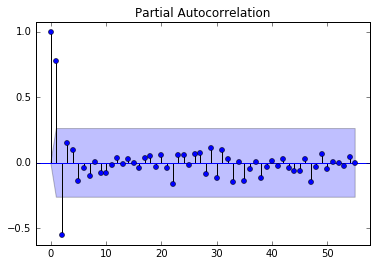

In [10]:
array = (housing.HousingStarts.as_matrix())
plot_pacf(array)

In [30]:
gdp['Diffrence of LOG of GPD'].autocorr(lag=1)
print gdp['LOG of GDP'].head()
print gdp['Diffrence of LOG of GPD'].head()


0    7.567589
1    7.566456
2    7.565438
3    7.581059
4    7.595656
Name: LOG of GDP, dtype: float64
0         NaN
1    7.567589
2    7.566456
3    7.565438
4    7.581059
Name: Diffrence of LOG of GPD, dtype: float64


In [47]:
gdp = pd.read_csv('gdp.csv')
gdp['Date'] = pd.to_datetime(gdp.DATE)
gdp['LOG of GDP'] = np.log(gdp.GDP)
gdp['LOG of GDP'] = gdp['LOG of GDP'].dropna()
gdp['Diffrence of LOG of GPD'] = gdp['LOG of GDP'] - gdp['LOG of GDP'].shift(periods=-1)
gdp['Diffrence of LOG of GPD'] = gdp['Diffrence of LOG of GPD'].dropna()
gdp = gdp[0:271]


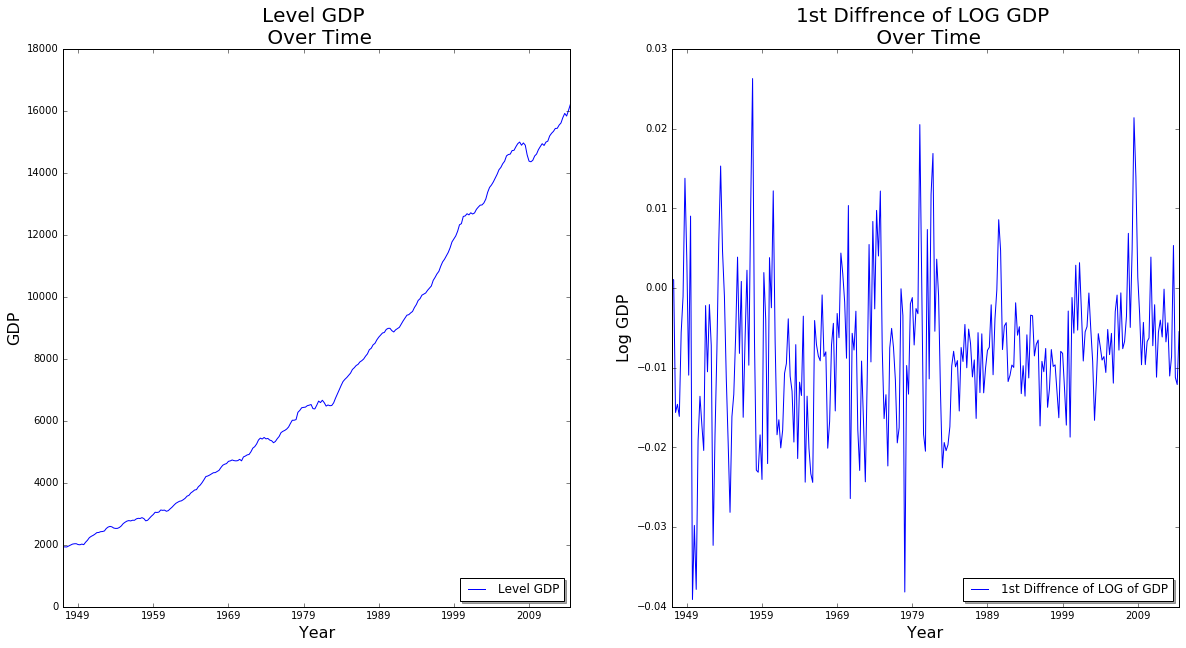

In [40]:
#1a and 1b
fig, ax = plt.subplots(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.plot(gdp.Date, gdp.GDP, label = "Level GDP")
plt.title("Level GDP \n Over Time",
             size = 20)
plt.ylabel('GDP', size = 16)
plt.xlabel('Year', size = 16)
plt.legend(loc='lower right', shadow=True)

plt.subplot(1, 2, 2)
#plt.plot(gdp.Date, gdp['LOG of GDP'], label = "Log of GDP")
plt.plot(gdp.Date, gdp['Diffrence of LOG of GPD'], label = '1st Diffrence of LOG of GDP')
plt.title("1st Diffrence of LOG GDP \n Over Time",
             size = 20)
plt.ylabel('Log GDP', size = 16)
plt.xlabel('Year', size = 16)
plt.legend(loc='lower right', shadow=True)

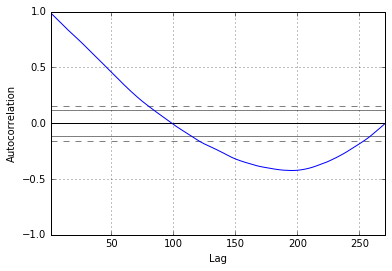

In [58]:
autocorrelation_plot(gdp['LOG of GDP'])

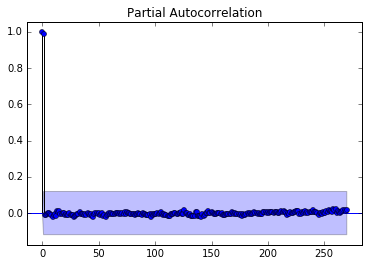

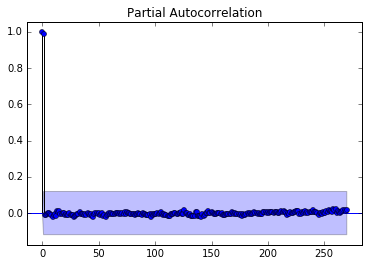

In [49]:
array = (gdp['LOG of GDP'].as_matrix())
plot_pacf(array)

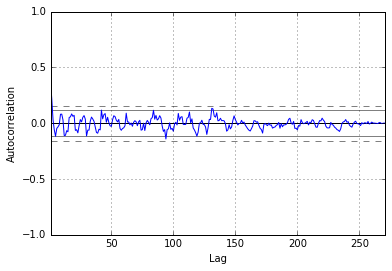

In [50]:
autocorrelation_plot(gdp['Diffrence of LOG of GPD'])

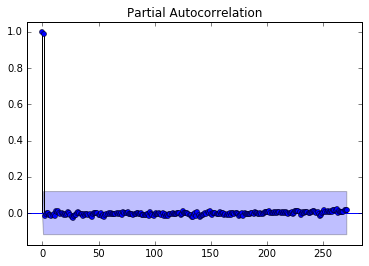

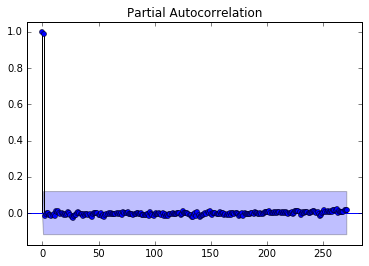

In [52]:
array = (gdp['Diffrence of LOG of GPD'].as_matrix())
plot_pacf(x)

In [53]:
cpi = pd.read_csv('cpi.csv')
cpi['DATE'] = pd.to_datetime(cpi.DATE)
cpi['LOGCPI'] = np.log(cpi.CPI)
cpi['LOGDIFCPI'] = cpi['LOGCPI'] - cpi['LOGCPI'].shift(periods=-1)
cpi = cpi[0:-1]


#cpi['LOGDIFCPI'][0:-1]

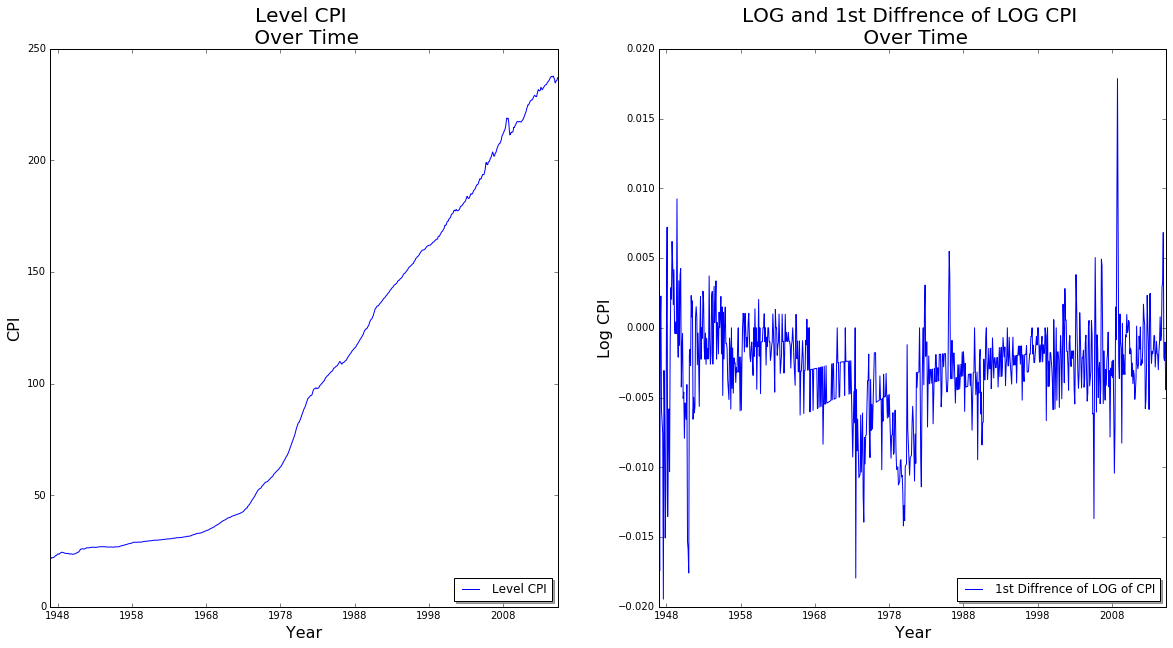

In [55]:
#1a and 1b
fig, ax = plt.subplots(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.plot(cpi.DATE, cpi.CPI, label = "Level CPI")
plt.title("Level CPI \n Over Time",
             size = 20)
plt.ylabel('CPI', size = 16)
plt.xlabel('Year', size = 16)
plt.legend(loc='lower right', shadow=True)

plt.subplot(1, 2, 2)
#plt.plot(cpi.DATE, cpi.LOGCPI, label = "Log of CPI")
plt.plot(cpi.DATE, cpi.LOGDIFCPI, label = '1st Diffrence of LOG of CPI')
plt.title("LOG and 1st Diffrence of LOG CPI \n Over Time",
             size = 20)
plt.ylabel('Log CPI', size = 16)
plt.xlabel('Year', size = 16)
plt.legend(loc='lower right', shadow=True)

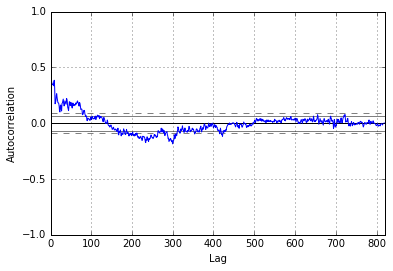

In [59]:
autocorrelation_plot(cpi.LOGDIFCPI)

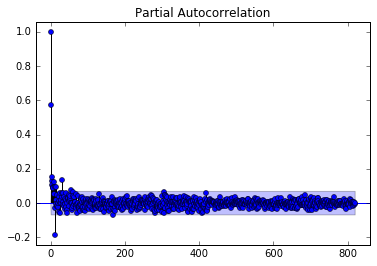

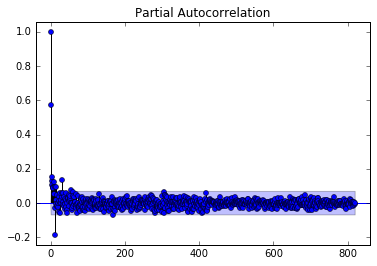

In [60]:
array = (cpi.LOGDIFCPI.as_matrix())
plot_pacf(array)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.96388599,  0.96749289,  0.97109808,  0.97470574,  0.97832272,
         0.98194257,  0.9855573 ,  0.98917068,  0.99278358,  0.99639232,
         1.        ,  0.99639232,  0.99278358,  0.98917068,  0.9855573 ,
         0.98194257,  0.97832272,  0.97470574,  0.97109808,  0.96749289,
         0.96388599]),
 <matplotlib.lines.Line2D at 0x10d3ce690>)

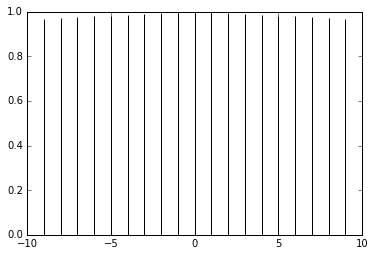

In [22]:
autocor = acorr(x)
autocor
#autocor[1]

In [63]:
gdp['Diffrence of LOG of GPD'].autocorr(lag=2)

0.21439440287686035

In [79]:
gdparray = (gdp['Diffrence of LOG of GPD'].as_matrix())
mymodel = ARIMA(gdparray, (2,1,0))

In [ ]:
mymodel =

In [80]:
ARMAResults(mymodel, [.333, .091])

AttributeError: 'ARIMA' object has no attribute 'sigma2'